# Data 620 - Week-3 Part-2 Assignment Data Sets

#### Austin Chan, Justin Herman, Chester Poon, Deepak Mongia, Michael O'Donnell

This assignment is to analyze a 2-node network - attendance of 18 Southern women at 14 social events. This is one of the most famous 2-node networks which has been used for analysis by many students and for many research papers. These data were collected by Davis et al in the 1930s.
To get the data, we will use a built-in bipartite graph in Networkx library.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite as bi
import pandas as pd
import operator

Importing the graph from Networkx:

In [2]:
G = nx.davis_southern_women_graph()

In [4]:
print(G.nodes())

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


In [5]:
print(bi.is_bipartite(G))

True


In [6]:
print(G.number_of_edges())

89


In [8]:
print(G.graph)

{'top': ['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price'], 'bottom': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']}


The above: G.graph is a dictionary which has 2 key elements, 1 for each type pf node - "top" nodes and "bottom" nodes. We will fetch both the sets of nodes and save them in 2 separate lists.

In [9]:
women = G.graph['top']
events = G.graph['bottom']

In [10]:
print(women)

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']


In [11]:
print(events)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


### Analyzing relationship among women:

First we take women as the primary nodes and determine the relationship among them by calculating the common events any 2 women go to. This is called projection - converying a bipartite graph into a 1-node network based on weights.
Networkx provides a function which can help with the projection.

In [12]:
womennet = bi.weighted_projected_graph(G, women, ratio=False)

In [15]:
print(womennet.nodes())

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']


In [16]:
print(womennet.number_of_nodes())

18


In [17]:
print(womennet.number_of_edges())

139


Calculating the weights of the edges among the women based on the common events any 2 women go to.

In [18]:
weights = [edata['weight'] for f, t, edata in womennet.edges(data=True)]

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


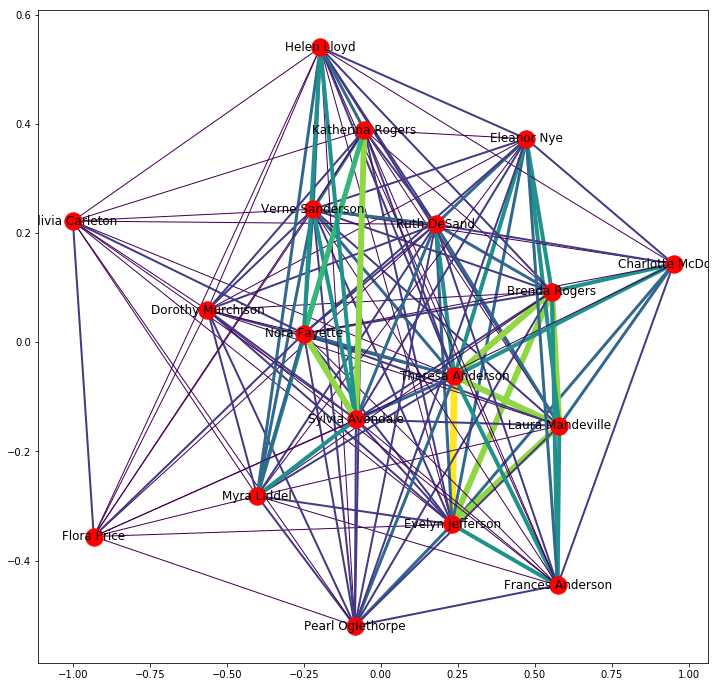

In [19]:
plt.figure(figsize=(12,12))
nx.draw_networkx(womennet, width=weights, edge_color=weights)

The thickness of the nodes between any 2 nodes is directly proportional to the common events those 2 women go to.

Top 7 connections among women (7 nodes with the maximum weight values):

In [21]:
sorted(womennet.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:8]

[('Evelyn Jefferson', 'Theresa Anderson', {'weight': 7}),
 ('Evelyn Jefferson', 'Brenda Rogers', {'weight': 6}),
 ('Evelyn Jefferson', 'Laura Mandeville', {'weight': 6}),
 ('Laura Mandeville', 'Theresa Anderson', {'weight': 6}),
 ('Laura Mandeville', 'Brenda Rogers', {'weight': 6}),
 ('Theresa Anderson', 'Brenda Rogers', {'weight': 6}),
 ('Katherina Rogers', 'Sylvia Avondale', {'weight': 6}),
 ('Sylvia Avondale', 'Nora Fayette', {'weight': 6})]

From above, we see that the strongest connection is between - Evelyn Jefferson and Theresa Anderson, and they went to 7 common events.

Calculating the degree centrality of the women in this network. This will signify who has the maximum or minimum number of neighors

In [24]:
women_centrality = nx.degree_centrality(womennet)
sorted_women_centrality = sorted(women_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_women_centrality

[('Evelyn Jefferson', 1.0),
 ('Theresa Anderson', 1.0),
 ('Ruth DeSand', 1.0),
 ('Verne Sanderson', 1.0),
 ('Sylvia Avondale', 1.0),
 ('Nora Fayette', 1.0),
 ('Helen Lloyd', 1.0),
 ('Pearl Oglethorpe', 0.9411764705882353),
 ('Myra Liddel', 0.9411764705882353),
 ('Katherina Rogers', 0.9411764705882353),
 ('Dorothy Murchison', 0.9411764705882353),
 ('Laura Mandeville', 0.8823529411764706),
 ('Brenda Rogers', 0.8823529411764706),
 ('Frances Anderson', 0.8823529411764706),
 ('Eleanor Nye', 0.8823529411764706),
 ('Olivia Carleton', 0.7058823529411764),
 ('Flora Price', 0.7058823529411764),
 ('Charlotte McDowd', 0.6470588235294118)]

As we see from above, there are 6 women who have the most degree centrality, that means the maximum number of neighbors. All these have degree centrality of 1, that means they are neighbors with every other woman in this network.

In [23]:
women_between_centrality = nx.betweenness_centrality(womennet)
sorted_women_between_centrality = sorted(women_between_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_women_between_centrality

[('Evelyn Jefferson', 0.010122230710466005),
 ('Theresa Anderson', 0.010122230710466005),
 ('Ruth DeSand', 0.010122230710466005),
 ('Verne Sanderson', 0.010122230710466005),
 ('Sylvia Avondale', 0.010122230710466005),
 ('Nora Fayette', 0.010122230710466005),
 ('Helen Lloyd', 0.010122230710466005),
 ('Pearl Oglethorpe', 0.0053475935828877),
 ('Myra Liddel', 0.0053475935828877),
 ('Katherina Rogers', 0.0053475935828877),
 ('Dorothy Murchison', 0.0053475935828877),
 ('Laura Mandeville', 0.0026737967914438505),
 ('Brenda Rogers', 0.0026737967914438505),
 ('Frances Anderson', 0.0026737967914438505),
 ('Eleanor Nye', 0.0026737967914438505),
 ('Charlotte McDowd', 0.0),
 ('Olivia Carleton', 0.0),
 ('Flora Price', 0.0)]

### Analyzing relationship among events:

Now we will take the events and see the commonalities among the events. In other words we will see which events are the ones where same 2 women went.

In [25]:
eventnet = bi.weighted_projected_graph(G, events, ratio=False)

In [27]:
print(eventnet.nodes())

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


In [28]:
print(eventnet.number_of_nodes())

14


In [29]:
print(eventnet.number_of_edges())

66


In [30]:
event_weights = [edata['weight'] for f, t, edata in eventnet.edges(data=True)]

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


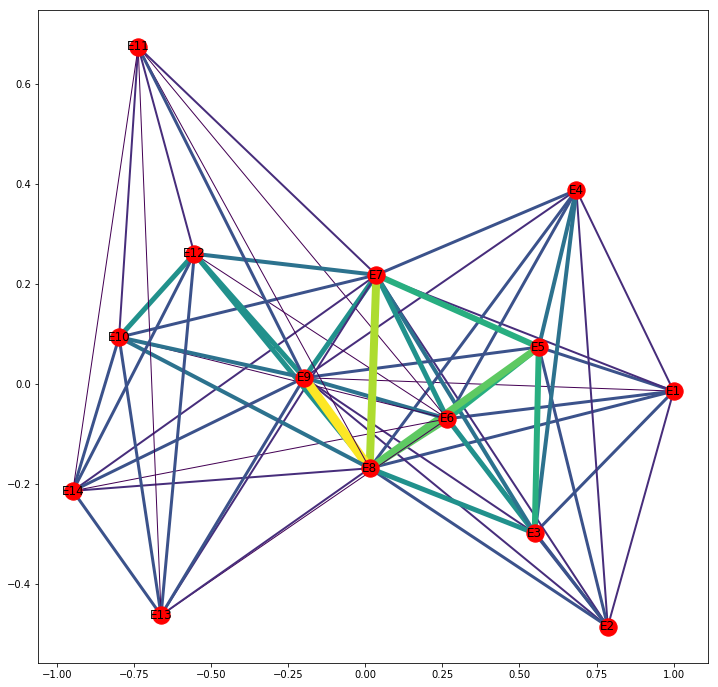

In [31]:
plt.figure(figsize=(12,12))
nx.draw_networkx(eventnet, width=event_weights, edge_color=event_weights)

Top event connections:

In [33]:
sorted(eventnet.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:7]

[('E8', 'E9', {'weight': 9}),
 ('E7', 'E8', {'weight': 8}),
 ('E5', 'E8', {'weight': 7}),
 ('E6', 'E8', {'weight': 7}),
 ('E3', 'E5', {'weight': 6}),
 ('E5', 'E6', {'weight': 6}),
 ('E5', 'E7', {'weight': 6})]

In [35]:
events_centrality = nx.degree_centrality(eventnet)
sorted_events_centrality = sorted(events_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_events_centrality

[('E6', 1.0),
 ('E7', 1.0),
 ('E8', 1.0),
 ('E9', 1.0),
 ('E1', 0.6153846153846154),
 ('E2', 0.6153846153846154),
 ('E3', 0.6153846153846154),
 ('E4', 0.6153846153846154),
 ('E5', 0.6153846153846154),
 ('E10', 0.6153846153846154),
 ('E11', 0.6153846153846154),
 ('E12', 0.6153846153846154),
 ('E13', 0.6153846153846154),
 ('E14', 0.6153846153846154)]

In [36]:
events_between_centrality = nx.betweenness_centrality(eventnet)
sorted_events_between_centrality = sorted(events_between_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_events_between_centrality

[('E6', 0.08012820512820512),
 ('E7', 0.08012820512820512),
 ('E8', 0.08012820512820512),
 ('E9', 0.08012820512820512),
 ('E1', 0.0),
 ('E2', 0.0),
 ('E3', 0.0),
 ('E4', 0.0),
 ('E5', 0.0),
 ('E10', 0.0),
 ('E11', 0.0),
 ('E12', 0.0),
 ('E13', 0.0),
 ('E14', 0.0)]

#### Conclusion:

From both parts of our above analysis, this network is found to be very closely knit network. From the first analysis of women as nodes, it is evident that the women share a lot of events. Particularly the women who attended most of the events look to be closely knit or friends.
Similarly from the events analysis, we see that there are 4 events which have most of the women coming attending them.